# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


#### Importar a Base de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
#Explorar dados importante

print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [4]:
# Correlação - Numero que vai de 0 -> 1 (pode ir de -1 a 1)
display(tabela.corr())

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


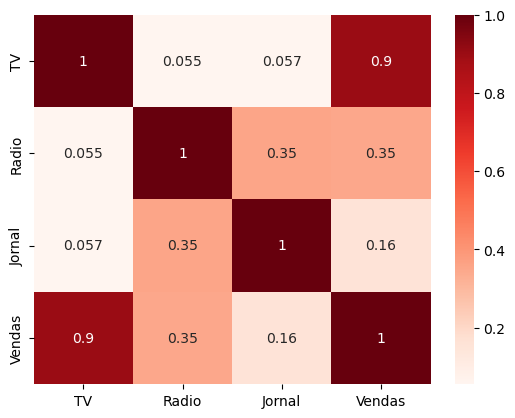

In [5]:
#Criar Gráfico - mapa de calor (Blues, Greens, ...)
sns.heatmap(tabela.corr(), cmap="Reds", annot=True)

#Exibe o Gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [6]:
y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

#pegar todas as colunas menos a y
# x= tabela.drop("Vendas")

from sklearn.model_selection import train_test_split

#x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)
# test_size=0.3 -> tamanho da amostra para teste 
# random_state=1 -> mantem estado das amostras para todas as vezes que carregar
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [9]:
#IMportar Inteligencia Artificial 1h:14min
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Criar Inteligencia Artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

#Treinar a inteligencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [11]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684272
0.9639515565963193


#### Visualização Gráfica das Previsões

In [14]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"]= y_teste
tabela_auxiliar["Previsao Arvore Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsao RegressaoLinear"] = previsao_regressaolinear
display(tabela_auxiliar)

,y_teste,Previsao Arvore Decisao,Previsao RegressaoLinear
58,23.8,23.347,21.288161
40,16.6,17.737,18.042132
34,11.9,12.758,10.059590
102,19.8,17.899,21.082241
184,17.6,20.240,20.764760
198,25.5,24.764,24.471874
95,16.9,16.844,16.806436
4,17.9,16.536,15.628857
29,10.5,11.185,10.124799
168,17.1,18.193,18.846019


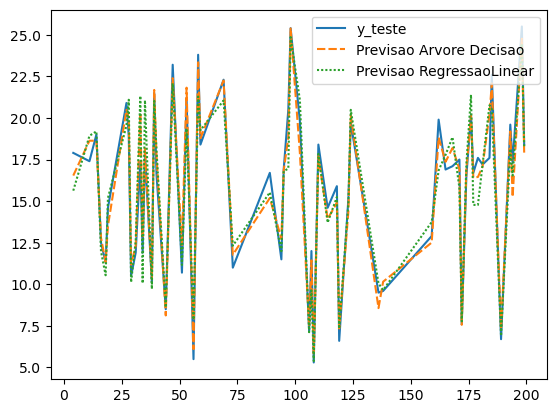

In [16]:
# vizualisar dados da inteligencia
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [18]:
ntabela = pd.read_csv("novos.csv")
display(ntabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [22]:
previsao = modelo_arvoredecisao.predict(ntabela)
print(previsao)

[ 7.586  8.761 20.035]
